# nvImageCodecs examples

In [10]:
import os
import cv2
from matplotlib import pyplot as plt

In [11]:
resources_dir = "../../resources"

Create Decoder and Encoder

In [12]:
from nvidia import nvimgcodecs
decoder = nvimgcodecs.Decoder()
encoder = nvimgcodecs.Encoder()

Load and decode Jpeg2000 image with nvImageCodecs

In [13]:
with open(resources_dir + "/base/cat.j2k", 'rb') as in_file:
    data = in_file.read()
    nv_img_cat = decoder.decode(data)

Save image to bmp file with nvImageCodecs

In [14]:
with open("cat-j2k-o.bmp", 'wb') as out_file:
    data = encoder.encode(nv_img_cat, "bmp")
    out_file.write(data)

Read back with OpenCV just saved (with nvImageCodecs) bmp image 

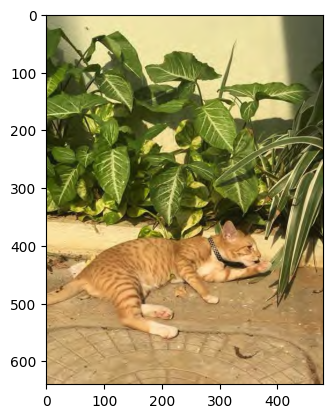

In [15]:
cv_img_4k_bmp = cv2.imread("cat-j2k-o.bmp")
cv_img_4k_bmp = cv2.cvtColor(cv_img_4k_bmp, cv2.COLOR_BGR2RGB)
plt.imshow(cv_img_4k_bmp)

Load and decode 4k Jpeg2000 (in jp2 container) image with nvImageCodecs in one function

In [16]:
nv_img4k = decoder.decode(resources_dir + "/base/4k_lossless.jp2")

Save 4k image to jpg file with nvImageCodecs

In [17]:
encoder.encode("4k_lossless-jp2-o.jpg", nv_img4k)

Read back with OpenCV just save (with nvImageCodecs) bmp image 

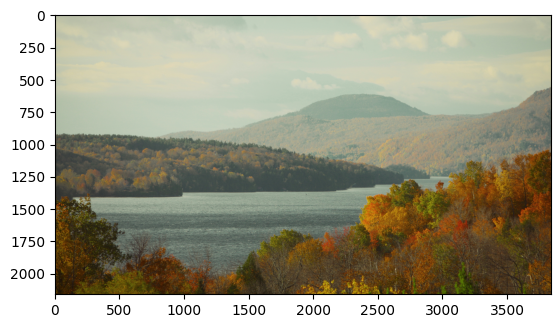

In [18]:
image = cv2.imread("4k_lossless-jp2-o.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Load jpg with nvImageCodecs

In [19]:
nv_img_jpg = decoder.decode(resources_dir + "/base/cat_q95_444.jpg")

Save as Jpeg 2000 with nvImageCodecs

In [20]:
encoder.encode("cat-jpg-o.j2k", nv_img_jpg)

Read back with OpenCV just saved (with nvImageCodecs) j2k image 

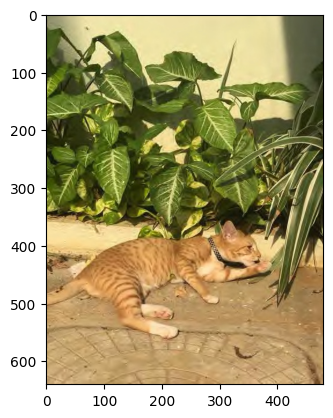

In [21]:
image = cv2.imread("cat-jpg-o.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Passing decoding parameters

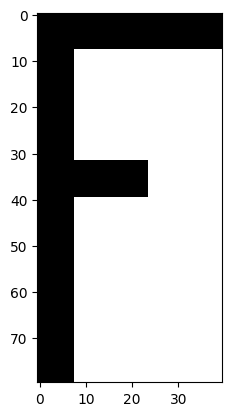

In [22]:
nv_img_jpg = nvimgcodecs.imread("{}/base/f8-exif.jpg".format(resources_dir), [nvimgcodecs.NVIMGCDCS_IMREAD_DEVICE_ID, 0])
nvimgcodecs.imwrite("f8-exif.bmp", nv_img_jpg)
image = cv2.imread("f8-exif.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Let assume we would like to ignore exif orientation

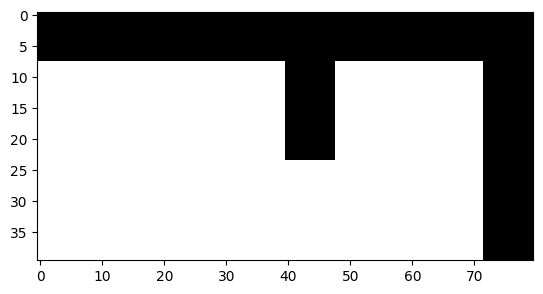

In [23]:
nv_img_jpg = nvimgcodecs.imread("{}/base/f8-exif.jpg".format(resources_dir), [nvimgcodecs.NVIMGCDCS_IMREAD_IGNORE_ORIENTATION])
nvimgcodecs.imwrite("f8-wo-exif.bmp", nv_img_jpg)
image = cv2.imread("f8-wo-exif.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Passing encoding parameters

Changing quality and chroma subsampling in jpeg

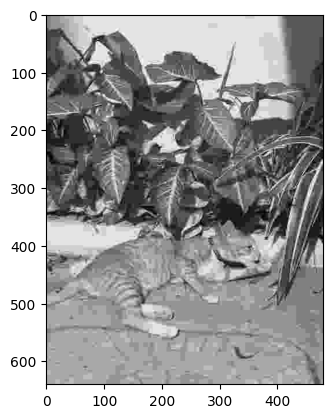

In [24]:
nv_img_jpg = nvimgcodecs.imread("{}/base/cat_q95_444.jpg".format(resources_dir))
nvimgcodecs.imwrite("cat-q5-gray.jpg", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG_QUALITY, 5, 
                     nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG_SAMPLING_FACTOR, nvimgcodecs.NVIMGCDCS_IMWRITE_SAMPLING_FACTOR_GRAY,
                     nvimgcodecs.NVIMGCDCS_IMWRITE_DEVICE_ID, 0])
image = cv2.imread("cat-q5-gray.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Encode lossless and lossy with jpeg2000

lossy file size: 1183
lossless file size: 138455
lossless 2 decomposition levels file size: 183742


[ WARN:0@52.374] global /io/opencv/modules/imgcodecs/src/grfmt_jpeg2000_openjpeg.cpp (607) readData OpenJPEG2000: Image has unknown or unspecified color space, SRGB is assumed


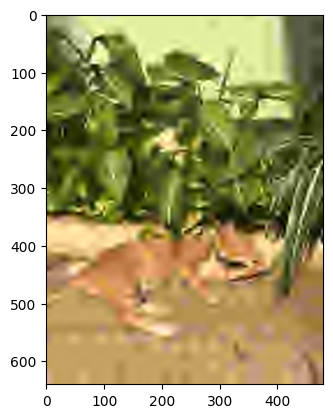

In [25]:
import ctypes
nv_img_jpg = nvimgcodecs.imread("{}/base/cat_q95_444.jpg".format(resources_dir))
nvimgcodecs.imwrite("cat-psnr20.j2k", nv_img_jpg, 
                [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_TARGET_PSNR, ctypes.c_uint32.from_buffer(ctypes.c_float(20.90)).value])
nvimgcodecs.imwrite("cat-lossless.j2k", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_REVERSIBLE])
nvimgcodecs.imwrite("cat-lossless-2decomps.j2k", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_REVERSIBLE, nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_NUM_DECOMPS, 2])
print("lossy file size:", os.path.getsize("cat-psnr20.j2k"))
print("lossless file size:", os.path.getsize("cat-lossless.j2k"))
print("lossless 2 decomposition levels file size:",
      os.path.getsize("cat-lossless-2decomps.j2k"))
image = cv2.imread("cat-psnr20.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### nvImageCodes Image  __cuda_array_interface__ support

In [26]:
print(nv_img4k.__cuda_array_interface__)
print(nv_img4k.shape)

{'shape': (2160, 3840, 3), 'strides': None, 'typestr': '=B', 'data': (34449915904, False), 'version': 2}
(2160, 3840, 3)
